In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### 1) Получите данные и загрузите их в рабочую среду

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/RedNetMaker/LearnML/refs/heads/main/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 2) Проведите первичный анализ

#### a) Проверьте данные на пропуски

In [5]:
data.isna().sum() # Смотрим сумму пропусков

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Очищаем данные от неизвестных значений

In [6]:
df = data.loc[data['workclass'] != '?']
df = df.loc[data['occupation'] != '?']
df = df.loc[data['native-country'] != '?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


#### b) Постройте 1-2 графика на выбор

In [7]:

df_more = df[df['income'] == '>50K']
df_less = df[df['income'] == '<=50K']

<function matplotlib.pyplot.show(close=None, block=None)>

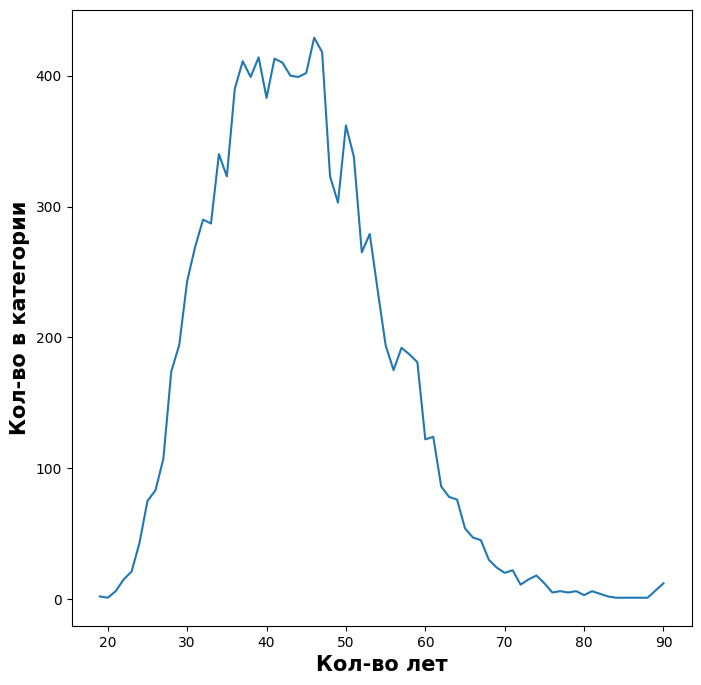

In [52]:
grouped_age = df_more[['age', 'income']].groupby('age')
grouped_age = grouped_age.count()

plt.figure(figsize=(8,8))
plt.plot(grouped_age.index, grouped_age['income'])
plt.xlabel('Кол-во лет', fontweight ='bold', fontsize = 15) 
plt.ylabel('Кол-во в категории', fontweight ='bold', fontsize = 15) 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

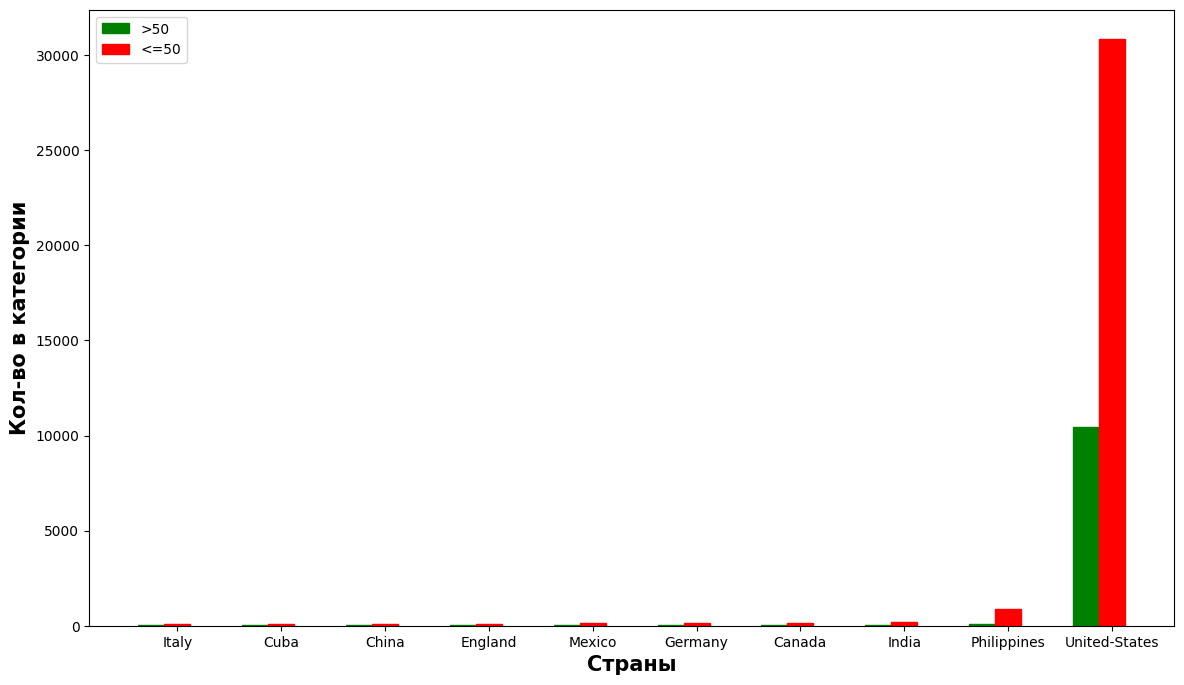

In [ ]:
grouped_country_more = df_more[['native-country', 'income']].groupby('native-country')
grouped_country_more = grouped_country_more.count().sort_values('income').tail(10)

grouped_country_less = df_less[['native-country', 'income']].groupby('native-country')
grouped_country_less = grouped_country_less.count().sort_values('income').tail(10)

br1 = np.arange(10)
br2 = [x + 0.25 for x in br1]

plt.subplots(figsize=(14,8))
plt.bar(br1, grouped_country_more['income'], color ='g', width = 0.25, edgecolor ='green', label ='>50') 
plt.bar(br2, grouped_country_less['income'], color ='r', width = 0.25, edgecolor ='red', label ='<=50') 
plt.xlabel('Страны', fontweight ='bold', fontsize = 15) 
plt.ylabel('Кол-во в категории', fontweight ='bold', fontsize = 15) 
plt.xticks([r + 0.25 for r in range(10)], 
        grouped_country_more.index)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

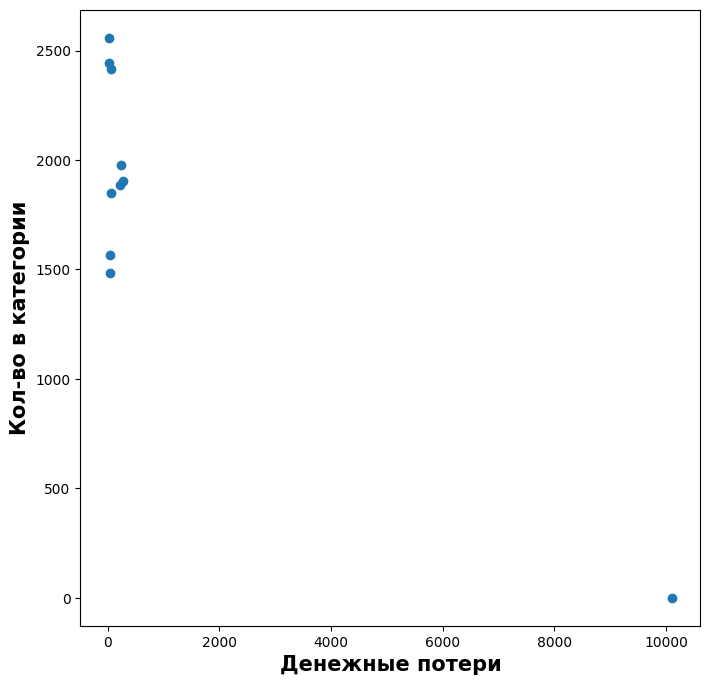

In [51]:
grouped_mat_status = df_more[['capital-loss', 'income']].groupby('capital-loss')
grouped_mat_status = grouped_mat_status.count().sort_values('income').tail(10)

plt.figure(figsize=(8,8))
plt.scatter(grouped_mat_status['income'], grouped_mat_status.index)
plt.xlabel('Денежные потери', fontweight ='bold', fontsize = 15) 
plt.ylabel('Кол-во в категории', fontweight ='bold', fontsize = 15) 
plt.show

**Как мы видим, категория не зависит от страны и денежных потерь, значит эти поля можно убрать**

#### c) Преобразуйте категориальные признаки

In [58]:
from sklearn.preprocessing import LabelEncoder

selectedColumns = df[['age', 'educational-num', 'capital-gain', 'hours-per-week', 'occupation']]
X = pd.get_dummies(selectedColumns, columns=['occupation'])

le = LabelEncoder().fit(df['income'])

y = pd.Series(data=le.transform(df['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

### 3) Разделите выборку на обучающее и тестовое подмножество

In [65]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.index

Index([21762, 21701, 42663, 42694, 13590, 47537, 42284,  2021, 48236, 46692,
       ...
       15594, 37624, 15046, 42351,  6849, 39182,  3157,  2411, 32125, 10882],
      dtype='int64', length=9045)

### 4) Обучите модели логистической регрессии и опорных векторов на обучающем множестве

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

logistic_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

SVC_model = make_pipeline(
    StandardScaler(),
    SVC()
)

In [120]:
logistic_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [121]:
SVC_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

### 5) Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей

**Логистическая модель**

In [111]:
train_score = logistic_model.score(X_train, y_train)
print('Тренировочная точность: ' + str(train_score))
test_score = logistic_model.score(X_test, y_test)
print('Тестовая точность: ' + str(test_score))

Тренировочная точность: 0.8103767587141001
Тестовая точность: 0.8127142067440575


**Модель SVC**

In [112]:
train_score = SVC_model.score(X_train, y_train)
print('Тренировочная точность: ' + str(train_score))
test_score = SVC_model.score(X_test, y_test)
print('Тестовая точность: ' + str(test_score))

Тренировочная точность: 0.8172043010752689
Тестовая точность: 0.820342730790492


### 6) Сформулируйте выводы по проделанной работе

#### a) Кратко опишите какие преобразования были сделаны с данными

Проверка на пустые значения ничего не выявила. Но я заметил неизвестные значения, что по моему мнению может помешать правильному обучению модели, поэтому я их очистил

#### b) Сравните точность двух моделей

Как мы видим, **Тренировочная точность: 0.8172043010752689** и **Тестовая точность: 0.820342730790492** у модели SVC больше, чем у Логистической регрессией с **Тренировочная точность: 0.8103767587141001** и **Тестовая точность: 0.8127142067440575**

#### c) Напишите свое мнение

Мы видим что в данной задачи хорошую точность показывает модель SVC, но использовать лучше Логистическую модель, т.к. она предсказывает намного быстрее, но не сильно теряет в точности. 